In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [4]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"
Mexico['host_acceptance_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_acceptance_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['host_acceptance_rate'].max()
Min = Mexico['host_acceptance_rate'].min()
Limites = [Min, Max]
Limites

[0.23, 1.0]

In [7]:
# Calculamos el rango R
R = Max - Min
R

0.77

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582
ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.049076998656024315

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (0.23, 1, 16)
intervalos

array([0.23      , 0.28133333, 0.33266667, 0.384     , 0.43533333,
       0.48666667, 0.538     , 0.58933333, 0.64066667, 0.692     ,
       0.74333333, 0.79466667, 0.846     , 0.89733333, 0.94866667,
       1.        ])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Mexico['host_acceptance_rate'] = pd.cut ( x = Mexico ['host_acceptance_rate'], bins = intervalos, labels = categorias )
Mexico['host_acceptance_rate']

0        Categoria13
1        Categoria14
2         Categoria7
3        Categoria15
4        Categoria15
            ...     
26577    Categoria15
26578    Categoria15
26579    Categoria15
26580    Categoria15
26581    Categoria15
Name: host_acceptance_rate, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [13]:
table1 = freq_tbl(Mexico['host_acceptance_rate'])
table1

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,Categoria15,17712,0.666316,0.666366
1,Categoria13,3727,0.140208,0.806584
2,Categoria14,2348,0.088330,0.894921
3,Categoria12,518,0.019487,0.914409
4,Categoria11,415,0.015612,0.930023
5,Categoria6,324,0.012189,0.942212
6,Categoria10,313,0.011775,0.953988
7,Categoria2,306,0.011512,0.965500
8,Categoria9,270,0.010157,0.975658
9,Categoria8,201,0.007562,0.983220


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_acceptance_rate,frequency
0,Categoria15,17712
1,Categoria13,3727
2,Categoria14,2348
3,Categoria12,518
4,Categoria11,415
5,Categoria6,324
6,Categoria10,313
7,Categoria2,306
8,Categoria9,270
9,Categoria8,201


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_acceptance_rate')
Filtro_index

,frequency
host_acceptance_rate,
Categoria15,17712
Categoria13,3727
Categoria14,2348
Categoria12,518
Categoria11,415
Categoria6,324
Categoria10,313
Categoria2,306
Categoria9,270


<Axes: xlabel='host_acceptance_rate'>

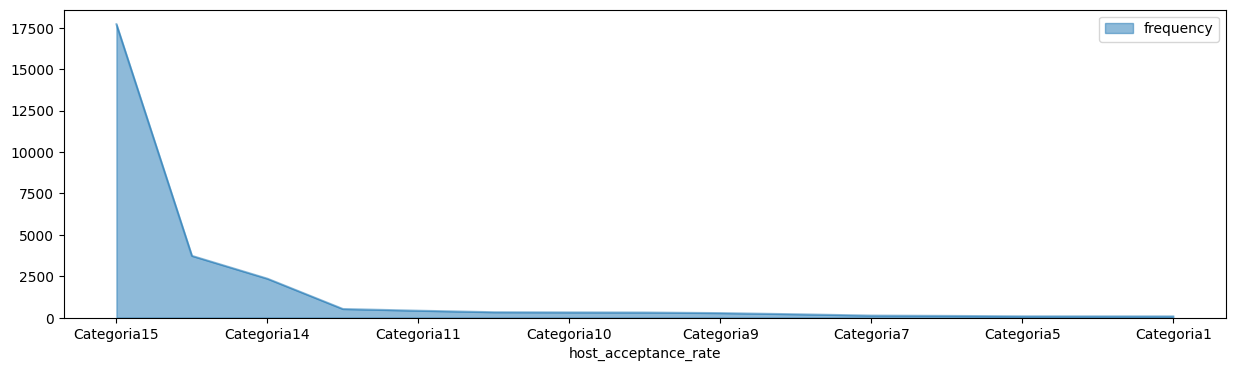

In [16]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)